In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../../data processing/preprocessed.csv')

In [3]:
X = df[['Sunshine', 'Humidity9am', 'Cloud9am', 'Cloud3pm','RainToday', 'Humidity3pm', 'Rainfall']]
y = df["RainTomorrow"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [6]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [7]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    importance = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
    print(importance)
    print('\n')
    sns.barplot(x = 'Feature Importance', y = importance.index, data=importance)

              precision    recall  f1-score   support

       False       0.84      0.83      0.84     34058
        True       0.43      0.46      0.44      9580

    accuracy                           0.75     43638
   macro avg       0.64      0.64      0.64     43638
weighted avg       0.75      0.75      0.75     43638



             Feature Importance
Humidity3pm            0.353159
Sunshine               0.228366
Humidity9am            0.193451
Cloud9am               0.091085
Cloud3pm               0.078889
Rainfall               0.053670
RainToday              0.001382




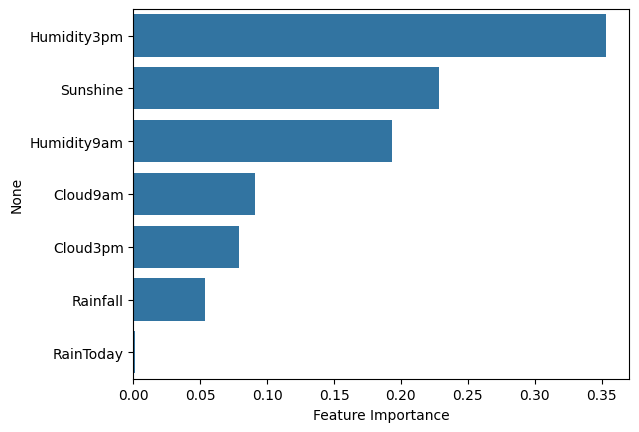

In [8]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
report_model(model)